In [290]:
#Importing needed libs
from qutip import *
import numpy as np
import scipy as sc
from scipy.constants import h
import matplotlib.pyplot as plt
from ipywidgets import interact

In [291]:
#Some defining for easier coding
down = fock(2,0)
up = fock(2,1)
state_00 = tensor(down, down)
state_01 = tensor(down, up)
state_10 = tensor(up, down)
state_11 = tensor(up, up)

#defining some of our constants
N = 2
w = 1 * 2 * np.pi 
gamma = 0.1 * w
c_ops = Qobj([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
t = np.linspace(0, 10, 201)
psi00= Qobj([[1], [0], [0], [0]])
psi01= Qobj([[0], [1], [0], [0]])

# Bell State


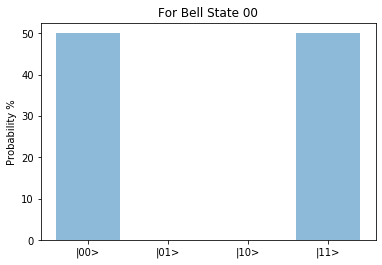

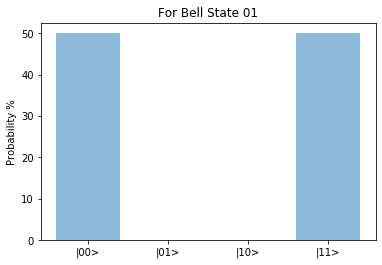

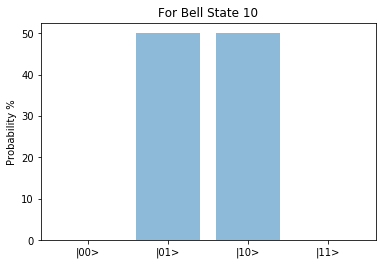

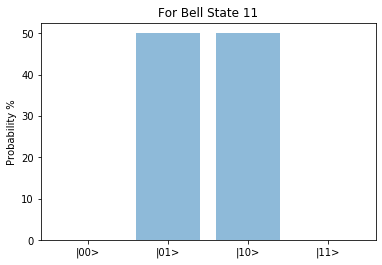

In [292]:
#Measuring
def get_probability(entanglement, answer, particle):
    entanglement = entanglement.unit()
    density_ab = entanglement * entanglement.dag()
    A = answer * answer.dag()
    B = A*density_ab.ptrace(particle)
    return B.tr()

def get_probability_both(entanglement, answer,answer2):
    entanglement = entanglement.unit()
    density_ab = entanglement * entanglement.dag()
    A = answer * answer.dag() 
    B = answer2*answer2.dag()
    A = tensor(A,B)
    C = A*density_ab
    return C.tr()
    
def show_on_graph(entaglement, title):
    values = []
    values.append(float(100 * get_probability_both(entaglement, down, down)))
    values.append(float(100 * get_probability_both(entaglement, down, up)))
    values.append(float(100 * get_probability_both(entaglement, up, down)))
    values.append(float(100 * get_probability_both(entaglement, up, up)))
    
    objects = ('|00>', '|01>', '|10>', '|11>')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability %')
    plt.title(title)

    plt.show()
    
#Measuring the bell states
entangled_00 = bell_state(state='00')
show_on_graph(entangled_00, "For Bell State 00")

entangled_01 = bell_state(state='01')
show_on_graph(entangled_01, "For Bell State 01")

entangled_10 = bell_state(state='10')
show_on_graph(entangled_10, "For Bell State 10")

entangled_11 = bell_state(state='11')
show_on_graph(entangled_11, "For Bell State 11")

# Partially entangled states


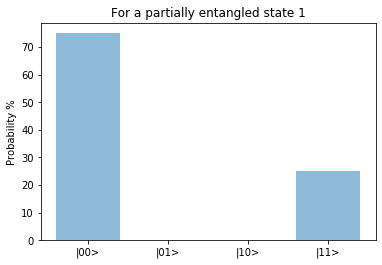

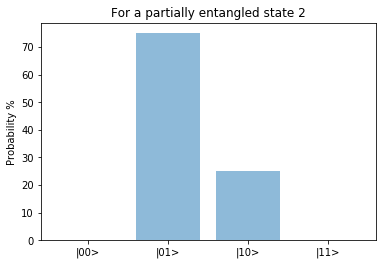

In [293]:
#Creating entangled states
def create_entangled_state(c0, c1, c2, c3):
    return (c0 * state_00 + c1 * state_01 + c2 * state_10 + c3 * state_11).unit() 
    
#Measuring partially entangled states
partially_entangled_1 = create_entangled_state(np.sqrt(3)/2, 0, 0, 0.5)
show_on_graph(partially_entangled_1, "For a partially entangled state 1")

partially_entangled_2 = create_entangled_state(0, np.sqrt(3)/2, 0.5, 0)
show_on_graph(partially_entangled_2, "For a partially entangled state 2")


# Entangled states with random errors

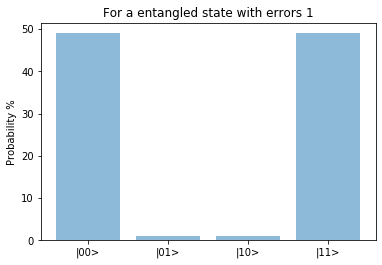

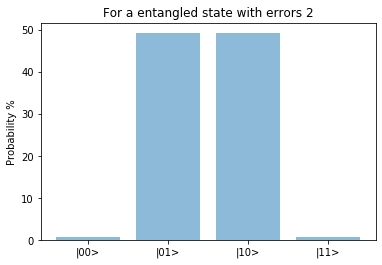

In [294]:
#Measuring partially entangled states with random errors
entangled_imperfect_1 = create_entangled_state(0.7, 0.1, 0.1, 0.7) 
show_on_graph(entangled_imperfect_1, "For a entangled state with errors 1")

entangled_imperfect_2 = create_entangled_state(0.1, 0.8, 0.8, 0.1)
show_on_graph(entangled_imperfect_2, "For a entangled state with errors 2")

# Heisenberg model xxx

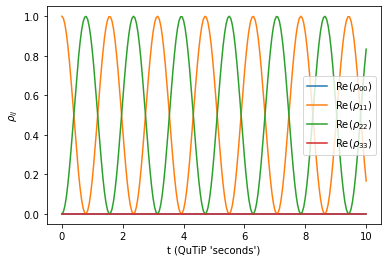

In [43]:
def create_heisenberg_model(J):
    return Qobj([[h + J, 0, 0, 0], [0, h - J, 2*J, 0], [0, 2*J, h - J, 0], [0, 0, 0, J - h]])
    
def plot_mesolve(H, psi, t, c_ops):
    states = mesolve(H, psi, t, c_ops).states
    plt.plot(t,np.real(expect(states, projection(4,0,0))), label=r'Re($\rho_{00}$)')
    plt.plot(t,np.real(expect(states, projection(4,1,1))), label=r'Re($\rho_{11}$)')
    plt.plot(t,np.real(expect(states, projection(4,2,2))), label=r'Re($\rho_{22}$)')
    plt.plot(t,np.real(expect(states, projection(4,3,3))), label=r'Re($\rho_{33}$)')
    plt.ylabel(r"$\rho_{ij}$")
    plt.xlabel("t (QuTiP 'seconds')")
    plt.legend()
    plt.show()

H = create_heisenberg_model(1)
plot_mesolve(H, psi01, t, c_ops)

In [296]:
def update_j(j=282):
    H = create_heisenberg_model(j)
    plot_mesolve(H, psi01, t, c_ops)
    
    
interact(update_j, j=(0, 500));

interactive(children=(IntSlider(value=0, description='j', max=500), Output()), _dom_classes=('widget-interact'…

# Ising

In [277]:
def create_icing_matrix(angle):
    return Qobj([[np.cos(angle), 0, 0, -1j * np.sin(angle)], [0, np.cos(angle), -1j * np.sin(angle), 0], [0, -1j * np.sin(angle), np.cos(angle), 0], [-1j * np.sin(angle), 0, 0, np.cos(angle)]])

def generate_entaglement_data_from_matrix(matrix):
    return create_entangled_state((matrix * projection(4,0,0)).tr(), (matrix * projection(4,1,1)).tr(), (matrix * projection(4,2,2)).tr(), (matrix * projection(4,3,3)).tr())

def update_phi(angle=0):
    H = 0.5 * w * create_icing_matrix(angle)
    A = (H * psi00).unit()
    result = A * A.dag()
    just_to_show = generate_entaglement_data_from_matrix(result)
    show_on_graph(just_to_show, "Probibility of states with diffrent phi's")
    
interact(update_phi, angle=(0,2 * np.pi));

interactive(children=(FloatSlider(value=0.0, description='angle', max=6.283185307179586), Output()), _dom_clas…